In [1]:
import json
import pandas as pd
with open("problems_with_embeddings.json","r",encoding='utf-8') as file:
    data = json.load(file)

reasoning_lengths = [item['reasoning_length'] for item in data][400:500]
problems  = [item['problem'] for item in data][400:500]
df = pd.DataFrame(reasoning_lengths, columns=["reasoning_length"])
df.describe()

,reasoning_length
count,100.000000
mean,6044.240000
std,4205.134205
min,609.000000
25%,2673.750000
50%,5659.500000
75%,8985.000000
max,16384.000000


In [3]:
import openai
from openai import OpenAI
from pl_tools import pl_prompt

output_data = []
flag=1
client = OpenAI(
    api_key="sk-jzamerxaovvufrqtwcwoiudvezbxczqlipozheuwqazveznw",
    base_url = "https://api.siliconflow.cn/"
)
for pro,reasoning_length in zip(problems,reasoning_lengths):
    print("hi")
    response = client.chat.completions.create(
        model="Qwen/Qwen2.5-14B-Instruct", 
        messages =[{"role":"user","content": pl_prompt.pl_prompt_0.format(new_problem=pro)}],   
        max_tokens=800         # 限制响应的最大token数量
    )
    
    print(response.choices[0].message)
    model_output = response.choices[0].message.content
    
    result = {
        "problem": pro,
        "reasoning_length":reasoning_length,
        "model_output": model_output
    }
    if flag:
        print(result)
        flag=0
    
    output_data.append(result)

with open('llm_output_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(output_data, json_file, ensure_ascii=False, indent=4)

print("所有数据已保存到output_data.json")

hi


In [2]:
import openai
import json
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from openai import OpenAI
from pl_tools import pl_prompt

# Retry logic function
def call_openai_with_retry(client, pro, reasoning_length, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            response = client.chat.completions.create(
                model="deepseek-chat", 
                messages=[{"role": "system", "content": "You are a helpful assistant"},
                          {"role": "user", "content": pl_prompt.pl_prompt_0.format(new_problem=pro)}],   
                max_tokens=800,
                stream=False
            )
            model_output = response.choices[0].message.content
            result = {
                "problem": pro,
                "reasoning_length": reasoning_length,
                "model_output": model_output
            }
            return result
        except Exception as e:
            print(f"Error on attempt {retries + 1} for problem {pro}: {e}")
            retries += 1
            time.sleep(2 ** retries)  # Exponential backoff
    return None  # If retries are exhausted

# Client initialization
client = OpenAI(
    api_key="sk-1c7bba5338bd45a9af5247e6f1521e5f",
    base_url="https://api.deepseek.com"
)

# To store the results
output_data = []

# Create a ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    futures = []
    
    # Iterate through problems and reasoning_lengths to submit tasks
    for pro, reasoning_length in zip(problems, reasoning_lengths):
        futures.append(executor.submit(call_openai_with_retry, client, pro, reasoning_length))

    # Collect results as they are completed
    for future in as_completed(futures):
        result = future.result()
        if result:
            output_data.append(result)

# Save the output to a JSON file
with open('llm_output_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(output_data, json_file, ensure_ascii=False, indent=4)

print("所有数据已保存到output_data.json")


所有数据已保存到output_data.json


In [5]:
import json
import sys
sys.path.append(r"D:\math\A-reasoning_demo")
from tools.text import extract_box_number
with open ("llm_output_data.json") as file:
    data = json.load(file)

pre_l = [extract_box_number(item["model_output"]) for item in data]
r_l = [item['reasoning_length'] for item in data]


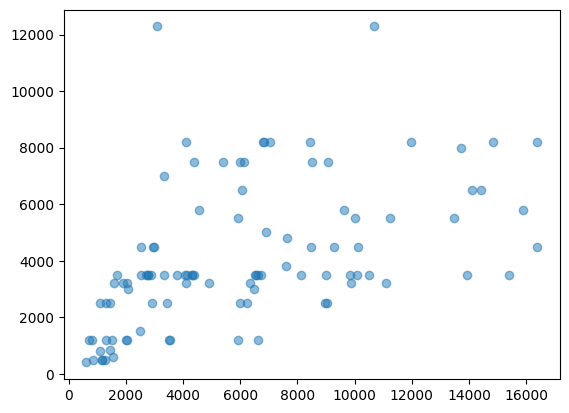

In [9]:
import matplotlib.pyplot  as plt
plt.scatter(r_l,pre_l,alpha=0.8)

In [14]:
import json
import pandas as pd
with open(r"D:\math\A-reasoning_demo\reasoning_datasets\HuggingFaceH4\MATH-500.jsonl","r",encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# reasoning_lengths = [item['reasoning_length'] for item in data][400:500]
problems  = [item['problem'] for item in data]
# df = pd.DataFrame(reasoning_lengths, columns=["reasoning_length"])
# df.describe()

In [16]:
print(len(problems))

150


In [17]:
import openai
import json
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from openai import OpenAI
from pl_tools import pl_prompt

# Retry logic function
def call_openai_with_retry(client, pro, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            response = client.chat.completions.create(
                model="deepseek-chat", 
                messages=[{"role": "system", "content": "You are a helpful assistant"},
                          {"role": "user", "content": pl_prompt.pl_prompt_0.format(new_problem=pro)}],   
                max_tokens=800,
                stream=False
            )
            model_output = response.choices[0].message.content
            result = {
                "problem": pro,
                "model_output": model_output
            }
            return result
        except Exception as e:
            print(f"Error on attempt {retries + 1} for problem {pro}: {e}")
            retries += 1
            time.sleep(2 ** retries)  # Exponential backoff
    return None  # If retries are exhausted

# Client initialization
client = OpenAI(
    api_key="sk-1c7bba5338bd45a9af5247e6f1521e5f",
    base_url="https://api.deepseek.com"
)

# To store the results
output_data = []

# Create a ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    futures = []
    
    # Iterate through problems and reasoning_lengths to submit tasks
    for pro in problems:
        futures.append(executor.submit(call_openai_with_retry, client, pro))

    # Collect results as they are completed
    for future in as_completed(futures):
        result = future.result()
        if result:
            output_data.append(result)

# Save the output to a JSON file
with open('llm_output_data_math_500.json', 'w', encoding='utf-8') as json_file:
    json.dump(output_data, json_file, ensure_ascii=False, indent=4)

print("所有数据已保存到output_data.json")


所有数据已保存到output_data.json
